# Section 2.2: Implementation of the K-Means Clustering
Import modules needed.

In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

Read the CSV file provided to get the dataset.

In [2]:
dataset = pd.read_csv('Task2_dataset_DogBreeds.csv')
print(dataset)

     height  tail length  leg length  nose circumference
0     5.151        3.535       1.414               0.202
1     4.949        3.030       1.414               0.202
2     4.747        3.232       1.313               0.202
3     4.646        3.131       1.515               0.202
4     5.050        3.636       1.414               0.202
..      ...          ...         ...                 ...
295   6.834        3.060       5.304               2.346
296   6.426        2.550       5.100               1.938
297   6.630        3.060       5.304               2.040
298   6.324        3.468       5.508               2.346
299   6.018        3.060       5.202               1.836

[300 rows x 4 columns]


Implement functions.

In [25]:
def compute_euclidean_distance(vec_1, vec_2):
    '''
    Calculate the euclidean distance of 2 vectors.

    :param vec_1: Vector 1
    :param vec_2: Vector 2
    :returns: the euclidean distance of Vector 1 and Vector 2
    '''
    
    distance = np.sqrt(np.sum(np.square(vec_1 - vec_2)))
    return distance


def initialise_centroids(dataset, k):
    '''
    Randomly initialise centroids.

    :param dataset: a given dataset
    :param k: the number of clusters
    :returns: a NumPy array of k points randomly picked from the given dataset as initial centroids
    '''

    pointNum, dimension = dataset.shape
    centroids = np.zeros((k, dimension))
    pointIndexList = [index for index in range(pointNum)]
    pointIndexList_picked = random.sample(pointIndexList, k)

    for count in range(k): # range: [0, k)
        centroids[count, :] = dataset[pointIndexList_picked[count], :]

    return centroids


def kmeans(dataset, k):
    '''
    Cluster a given dataset into k groups.

    :param dataset: a given dataset
    :param k: the number of clusters
    :returns: 1. a NumPy array of final centroids after clustering
              2. a dictionary storing each point's cluster and each iteration step's objective function
    '''

    pointNum = dataset.shape[0]
    centroids = initialise_centroids(dataset, k) # randomly initialise centroids
    hasChangedCluster = True

    '''
    the value paired with the key ClusterNo is a list storing each point's cluster;
    the value paired with the key ObjectiveFunc is a list storing each iteration step's objective function
    '''
    cluster_assigned = {'ClusterNo': [0 for count in range(pointNum)], 'ObjectiveFunc': []}
    
    # loop for iteration until none of the cluster assignments change
    while hasChangedCluster:
        hasChangedCluster = False
        totalDistance = 0

        for i in range(pointNum): # range: [0, pointNum)
            distanceList = []

            # loop to store the euclidean distance of a centroid and the point
            for j in range(k): # range: [0, k)
                distance = compute_euclidean_distance(centroids[j, :], dataset[i, :])
                distanceList.append(distance)
            
            minDistance = min(distanceList)
            centroidIndex = distanceList.index(minDistance) # select the centroid who is closest to the point
            totalDistance += minDistance
            
            if cluster_assigned['ClusterNo'][i] != centroidIndex:
                hasChangedCluster = True
                cluster_assigned['ClusterNo'][i] = centroidIndex # update the point's cluster

        # loop to update each cluster's centroid
        for count in range(k): # range: [0, k)
            '''
            first, mark this cluster's points with True (1) and the rest with False (0);
            second, get the indexes of points marked with 1 which is also the indexes of the cluster's points in the dataset
            '''
            clusterPoints = dataset[np.nonzero(np.array(cluster_assigned['ClusterNo']) == count)[0], :]
            centroids[count, :] = np.average(clusterPoints, axis = 0) # the new centroid is the average of the cluster's points

        cluster_assigned['ObjectiveFunc'].append(totalDistance) # store this iteration step's objective function

    return centroids, cluster_assigned

Plot a scatter plot where the x-axis is "height" and the y-axis is "tail length".<br />
Plot a scatter plot where the x-axis is "height" and the y-axis is "leg length".<br />
Plot a line plot where the x-axis is iteration step and the y-axis is objective function.

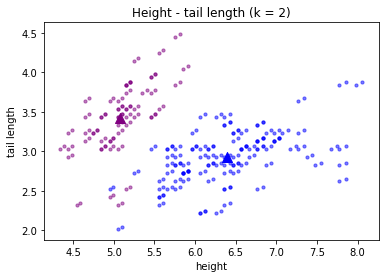

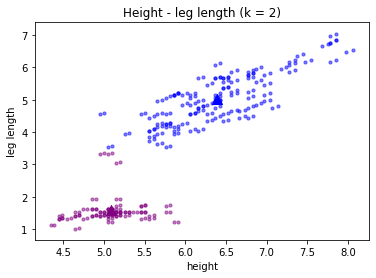

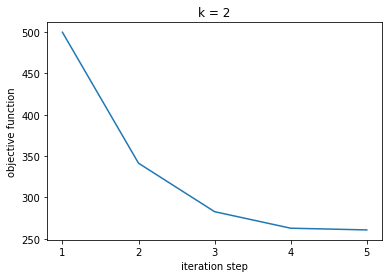

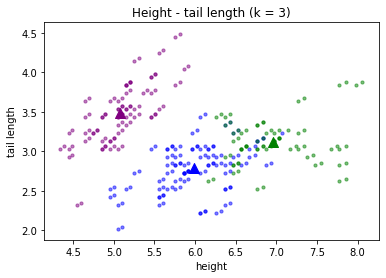

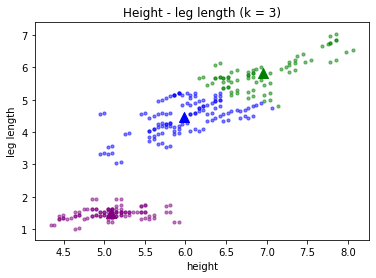

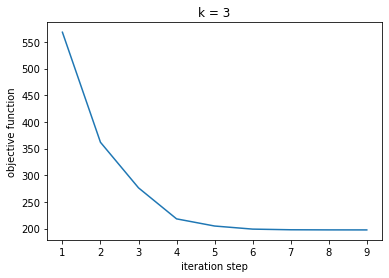

In [33]:
dataset = np.array(dataset)
height_tail = dataset[:, [0, 1]]
height_leg = dataset[:, [0, 2]]

for k in [2, 3]:
    centroids, cluster_assigned = kmeans(dataset, k) # cluster the dataset into k groups
    colours = ['purple', 'blue', 'green']

    # plot the scatter plots "height - tail length" and "height - leg length"
    for data in [height_tail, height_leg]:
        plt.xlabel('height')
        
        if data is height_tail:
            plt.title('Height - tail length (k = {})'.format(k))
            plt.ylabel('tail length')
        
            for count in range(k): # range: [0, k)
                plt.scatter(centroids[count, 0], centroids[count, 1], s = 100, c = colours[count], marker = '^')
        else:
            plt.title('Height - leg length (k = {})'.format(k))
            plt.ylabel('leg length')
            
            for count in range(k): # range: [0, k)
                plt.scatter(centroids[count, 0], centroids[count, 2], s = 100, c = colours[count], marker = '^')
        
        for count in range(data.shape[0]): # range: [0, data.shape[0])
            colourIndex = cluster_assigned['ClusterNo'][count] # set different colours to clusters
            plt.scatter(data[count, 0], data[count, 1], s = 10, c = colours[colourIndex], alpha = 0.5)
        
        plt.show()

    iterationStep = len(cluster_assigned['ObjectiveFunc'])

    # plot the line plot "iteration step - objective function"
    plt.title('k = {}'.format(k))
    plt.xlabel('iteration step')
    plt.ylabel('objective function')
    plt.xticks(range(1, iterationStep + 1))
    plt.plot([count for count in range(1, iterationStep + 1)], cluster_assigned['ObjectiveFunc'])
    plt.show()